# Machine Learning Boilerplate Workflow (Decision Tree Example)

## 1. Define Problem
- Goal: Predict if a tumor is malignant (0) or benign (1) based on clinical features.
- Decision Trees are intuitive "if-else" models but prone to overfitting.
    - ID3, C4.5, CART (Classification and Regression Trees), CHAID. These define how the tree splits nodes based on feature values to create pure subsets for classification or regression tasks. 
- Ensembles (Random Forest, Boosting) help improve generalization. Boosting Example: AdaBoost, Gradient Boosting Machines (GBM), XGBoost, LightGBM, and CatBoost.
- Rotation Forest is another technique that applies principal component analysis (PCA) on random subsets of features before training each tree to increase diversity and potentially improve ensemble accuracy.
- Other techniques are Pruning (reduce tree size to prevent overfitting), 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_breast_cancer # dataset
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    AdaBoostClassifier, GradientBoostingClassifier,
    StackingClassifier
)
from sklearn.linear_model import LogisticRegression


# Advanced libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

## 2. EDA

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

In [3]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [5]:
print("Dataset shape:", X.shape)
print("Target distribution:\n", y.value_counts(normalize=True))

Dataset shape: (569, 30)
Target distribution:
 target
1    0.627417
0    0.372583
Name: proportion, dtype: float64


In [6]:
print(X.describe().T.head())  # summary statistics

                 count        mean         std        min        25%  \
mean radius      569.0   14.127292    3.524049    6.98100   11.70000   
mean texture     569.0   19.289649    4.301036    9.71000   16.17000   
mean perimeter   569.0   91.969033   24.298981   43.79000   75.17000   
mean area        569.0  654.889104  351.914129  143.50000  420.30000   
mean smoothness  569.0    0.096360    0.014064    0.05263    0.08637   

                       50%       75%        max  
mean radius       13.37000   15.7800    28.1100  
mean texture      18.84000   21.8000    39.2800  
mean perimeter    86.24000  104.1000   188.5000  
mean area        551.10000  782.7000  2501.0000  
mean smoothness    0.09587    0.1053     0.1634  


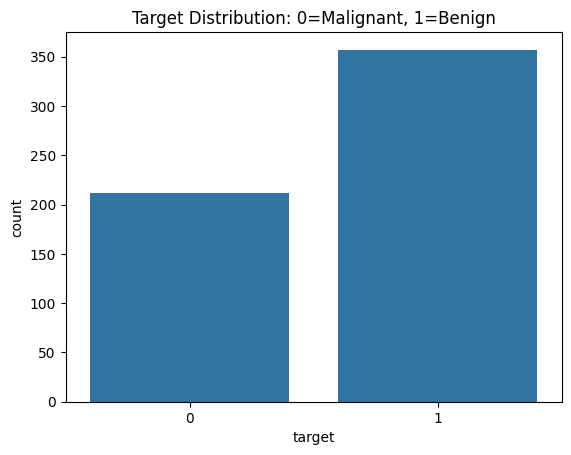

In [7]:
# Visualize class balance
sns.countplot(x=y)
plt.title("Target Distribution: 0=Malignant, 1=Benign")
plt.show()

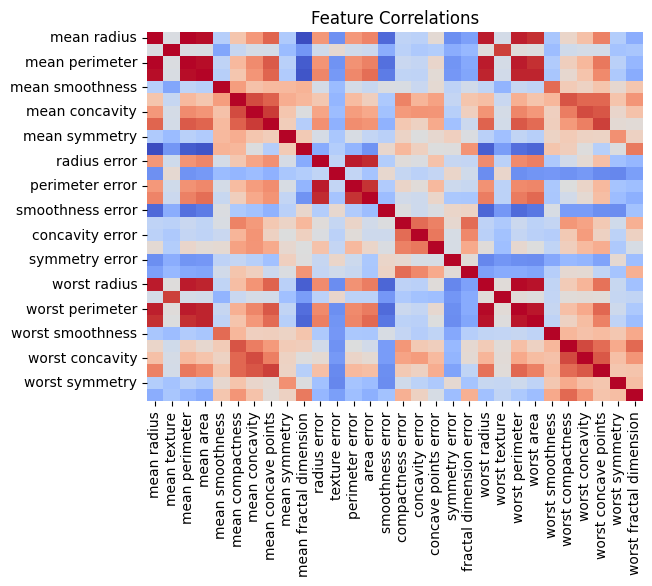

In [8]:
# Quick correlation heatmap (to see redundancy)
sns.heatmap(X.corr(), cmap="coolwarm", cbar=False)
plt.title("Feature Correlations")
plt.show()

## 3. Data Preparation

In [9]:
# Stratified Split ensures class proportions are similar across splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (455, 30)
X_test Shape:  (114, 30)
y_train Shape:  (455,)
y_test Shape:  (114,)


## 4 Baseline Decision Tree

In [10]:
# Decision Trees work with both numerical/categorical data, but this dataset is numerical

print("\n--- Decision Tree ---")
dt = DecisionTreeClassifier(criterion="gini", random_state=42)
dt.fit(X_train, y_train)
print("Accuracy:", dt.score(X_test, y_test))


--- Decision Tree ---
Accuracy: 0.9122807017543859


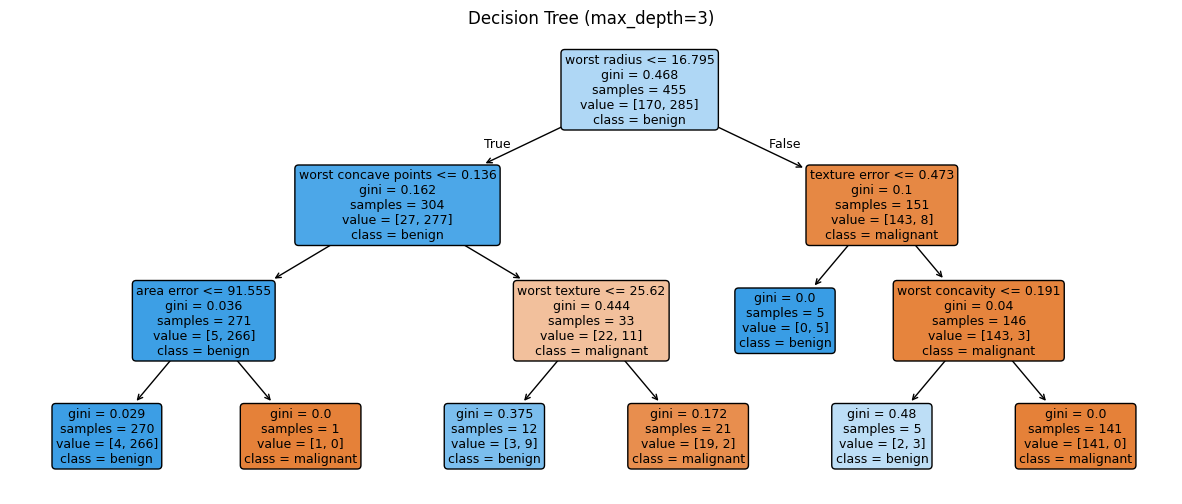

In [11]:
# Visualize tree (small depth for clarity)
small_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
small_dt.fit(X_train, y_train)
plt.figure(figsize=(15,6))
plot_tree(small_dt, feature_names=X.columns, class_names=data.target_names, filled=True, rounded=True, fontsize=9)
plt.title("Decision Tree (max_depth=3)")
plt.show()

## 5.1 Ensemble Tree Methods ("Bagging")

In [12]:
print("\n--- Random Forest (Bagging) ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Accuracy:", rf.score(X_test, y_test))


--- Random Forest (Bagging) ---
Accuracy: 0.956140350877193


## 5.2 Ensemble Tree with (Extra Trees)

In [13]:
print("\n--- Extra Trees (Bagging, More Randomization) ---")
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)
print("Accuracy:", et.score(X_test, y_test))


--- Extra Trees (Bagging, More Randomization) ---
Accuracy: 0.956140350877193


## 6. Boosting Variants

### 6.1 AdaBoost

In [14]:
print("\nAdaBoost (Boosting: Trees built sequentially)")
ab = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ab.fit(X_train, y_train)
print("AdaBoost Test Accuracy:", ab.score(X_test, y_test))


AdaBoost (Boosting: Trees built sequentially)
AdaBoost Test Accuracy: 0.956140350877193


In [15]:
print("\n--- Gradient Boosting ---")
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
print("Accuracy:", gb.score(X_test, y_test))


--- Gradient Boosting ---
Accuracy: 0.956140350877193


### 6.2 Gradient Boosting

In [16]:
print("\nGradient Boosting (Boosting: Residuals targeted)")
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
print("Gradient Boosting Test Accuracy:", gb.score(X_test, y_test))


Gradient Boosting (Boosting: Residuals targeted)
Gradient Boosting Test Accuracy: 0.956140350877193


### 6.3 XGBoost

In [17]:
print("\nXGBoost (Optimized Gradient Boosting)")
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, eval_metric="logloss", random_state=42, use_label_encoder=False)
xgb.fit(X_train, y_train)
print("XGBoost Test Accuracy:", xgb.score(X_test, y_test))


XGBoost (Optimized Gradient Boosting)
XGBoost Test Accuracy: 0.9473684210526315


### 6.4 LightGBM

In [18]:
print("\nLightGBM (Faster Gradient Boosting variant)")
lgbm = LGBMClassifier(n_estimators=200, learning_rate=0.05, random_state=42, verbose=-1)
lgbm.fit(X_train, y_train)
print("LightGBM Test Accuracy:", lgbm.score(X_test, y_test))


LightGBM (Faster Gradient Boosting variant)
LightGBM Test Accuracy: 0.9649122807017544


### 6.5 CatBoost

In [19]:
print("\nCatBoost (Handles categorical features)")
cat = CatBoostClassifier(iterations=200, learning_rate=0.05, depth=6, verbose=0, random_state=42)
cat.fit(X_train, y_train)
print("CatBoost Test Accuracy:", cat.score(X_test, y_test))


CatBoost (Handles categorical features)
CatBoost Test Accuracy: 0.956140350877193


## 7. Stacking (Ensemble of Ensembles) 

In [20]:
# Combines predictions of several base models using a meta model (here, Logistic Regression)
stack = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(eval_metric="logloss", random_state=42, use_label_encoder=False))
    ],
    final_estimator=LogisticRegression(max_iter=1000)
)
stack.fit(X_train, y_train)
print("Stacking Test Accuracy:", stack.score(X_test, y_test))

Stacking Test Accuracy: 0.956140350877193


# 8. Cross-Validation & Model Selection

In [21]:
print("\n--- Cross-Validation Comparison ---")
models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "Extra Trees": et,
    "AdaBoost": ab,
    "Gradient Boosting": gb,
    "XGBoost": xgb,
    "LightGBM": lgbm,
    "CatBoost": cat,
    "Stacking": stack
}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name:20}: Mean CV Accuracy={scores.mean():.4f} (+/- {scores.std():.4f})")


--- Cross-Validation Comparison ---
Decision Tree       : Mean CV Accuracy=0.9099 (+/- 0.0189)
Random Forest       : Mean CV Accuracy=0.9538 (+/- 0.0235)
Extra Trees         : Mean CV Accuracy=0.9714 (+/- 0.0256)
AdaBoost            : Mean CV Accuracy=0.9736 (+/- 0.0215)
Gradient Boosting   : Mean CV Accuracy=0.9560 (+/- 0.0098)
XGBoost             : Mean CV Accuracy=0.9670 (+/- 0.0220)
LightGBM            : Mean CV Accuracy=0.9758 (+/- 0.0189)
CatBoost            : Mean CV Accuracy=0.9758 (+/- 0.0213)
Stacking            : Mean CV Accuracy=0.9648 (+/- 0.0235)


## 9. Hyperparameter Tuning with GridSearch

In [22]:
# Grid search for Decision Tree (try more params as desired)
param_grid = {
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid, cv=5, n_jobs=-1, scoring="accuracy")
grid.fit(X_train, y_train)
print("Best GridSearchCV DT params:", grid.best_params_)
print("Best GridSearchCV DT Accuracy (CV):", grid.best_score_)
best_dt = grid.best_estimator_
print("Test Accuracy (tuned DT):", best_dt.score(X_test, y_test))

Best GridSearchCV DT params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Best GridSearchCV DT Accuracy (CV): 0.9384615384615385
Test Accuracy (tuned DT): 0.9210526315789473


#### The point of first running cross-validation (CV) accuracy for all models is to compare their generalization performance reliably on the training data before committing to any final model. CV splits the data into folds and evaluates each model multiple times on different subsets, providing a more robust and less biased estimate of how well each model will perform on unseen data.

#### Then, tuning via grid search or randomized search is typically done only on a selected model or a few promising models, often starting with a simpler baseline like the Decision Tree in your example. Hyperparameter tuning uses CV internally to find the best combination of parameters (e.g., max_depth, min_samples_split) that maximizes performance. This ensures:

    - We can avoid overfitting or underfitting by balancing model complexity.
    - We can objectively select hyperparameters that help the model generalize well.

**This grid search tuning is just for the base Decision Tree, but the same can be done for other models (Random Forest, XGBoost, LightGBM, etc.) if desired.**

#### Why do CV first, then tuning?
    - CV first gives us a performance baseline for different model types (simple trees, ensembles, boosting). Using this comparison, we can pick which models are worth tuning.
    - Hyperparameter tuning is computationally expensive, so you want to focus on models likely to improve.

**In summary, CV helps compare models fairly and tuning uses CV to optimize performance of a chosen model. Together, they form a robust model selection and optimization workflow in ML.**

## 10. Advanced: Cost-Complexity Pruning for Decision Trees

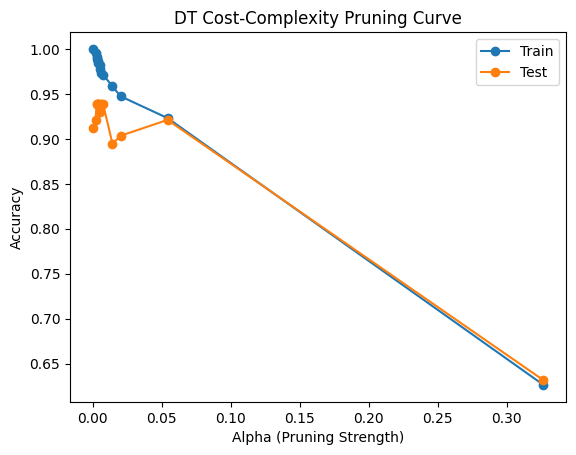

In [23]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
train_scores, test_scores = [], []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))


plt.plot(ccp_alphas, train_scores, marker='o', label="Train")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test")
plt.xlabel("Alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.title("DT Cost-Complexity Pruning Curve")
plt.legend()
plt.show()

#### Explanation of the steps
    - path = dt.cost_complexity_pruning_path(X_train, y_train)
This method computes a sequence of effective alpha values (ccp_alphas) and corresponding total leaf impurities for subtrees obtained by pruning the original tree. Each alpha represents a pruning strength parameter.

    - ccp_alphas = path.ccp_alphas
This extracts the list of alpha values, where a higher alpha means more aggressive pruning (simpler trees).

    - The loop iterates over all the candidate alphas:
For each alpha, it trains a new Decision Tree with ccp_alpha=alpha, which prunes branches that do not provide sufficient gain relative to the complexity cost controlled by alpha.

    - It records training and testing accuracy for each pruned tree. This enables you to analyze how pruning affects model performance.

1. Lower alpha = less pruning, more complex tree, potentially overfitting
2. Higher alpha = more pruning, simpler tree, potentially underfitting

The curve helps us choose the optimal alpha balancing bias-variance tradeoff: the alpha value where test accuracy is highest or plateaus typically gives a pruned model that generalizes well.

## 11. Evaluation: ROC, Confusion Matrix, Feature Importance

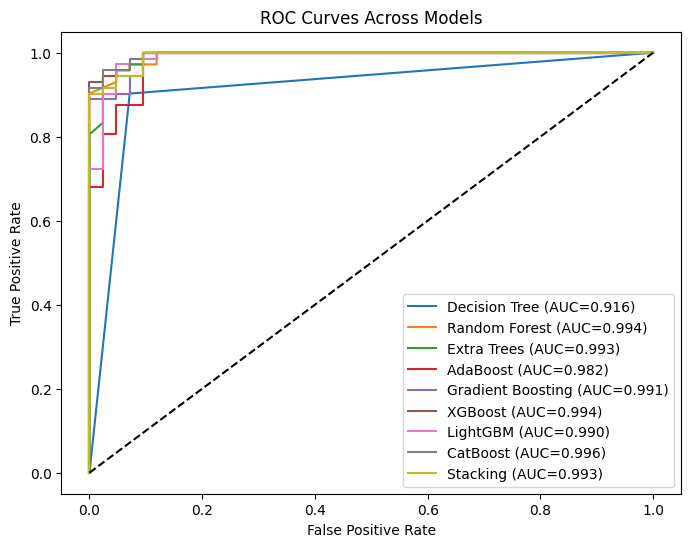

In [24]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc = roc_auc_score(y_test, y_probs)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Across Models")
plt.legend()
plt.show()

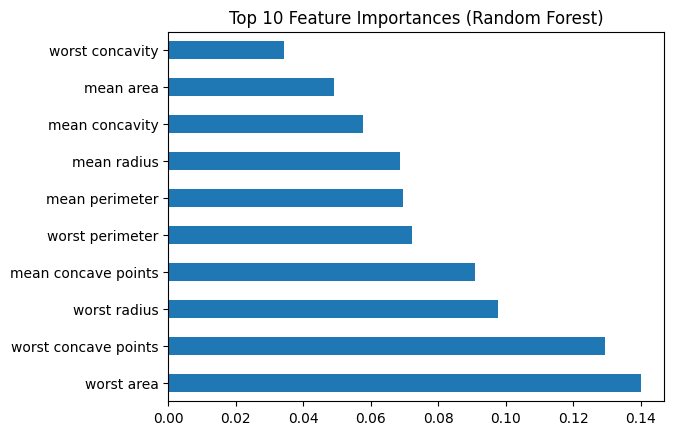

In [25]:
# Visualize Feature Importances for an ensemble model (e.g., Random Forest)
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind="barh")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

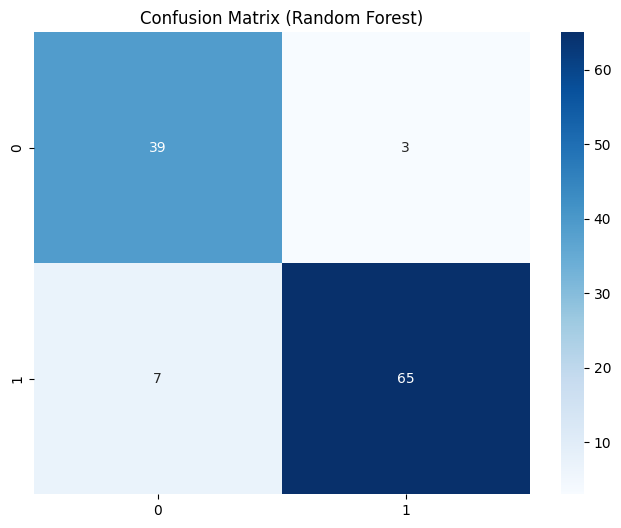

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



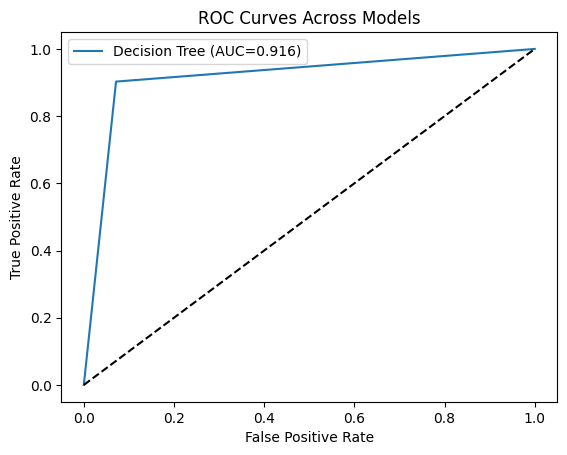

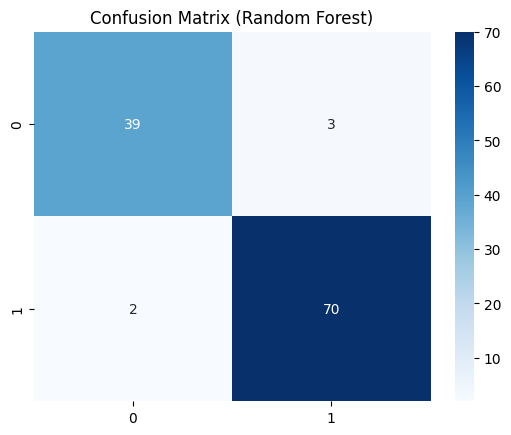

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



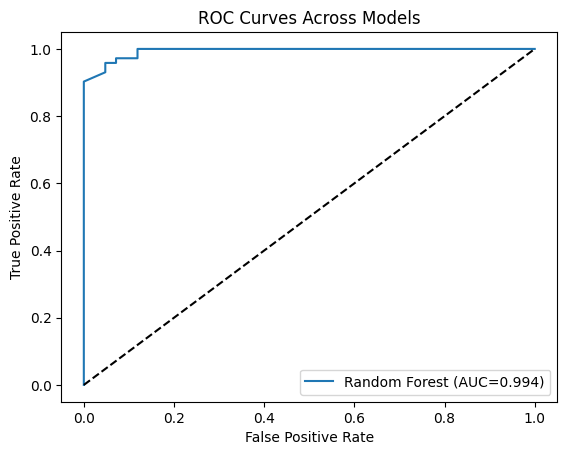

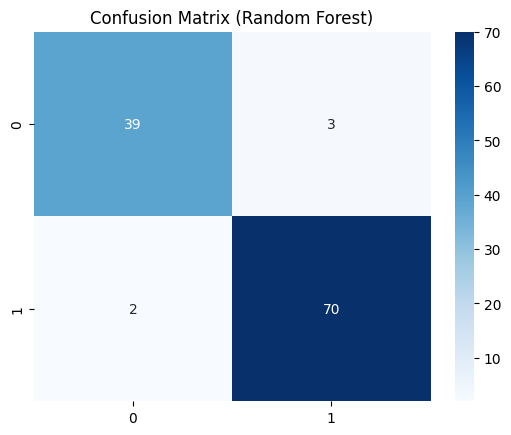

Classification Report (Extra Trees):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



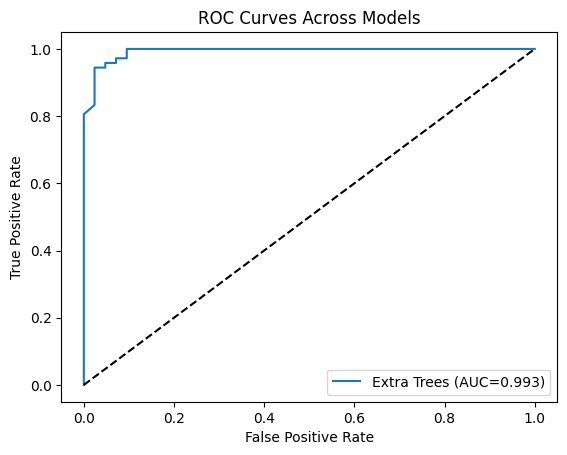

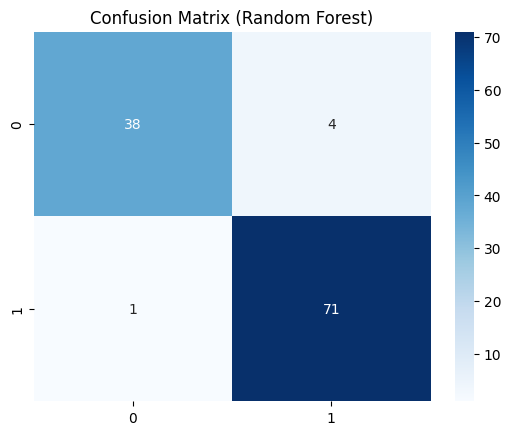

Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



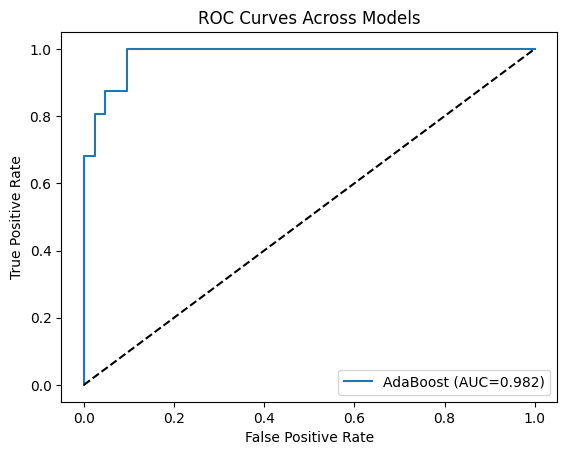

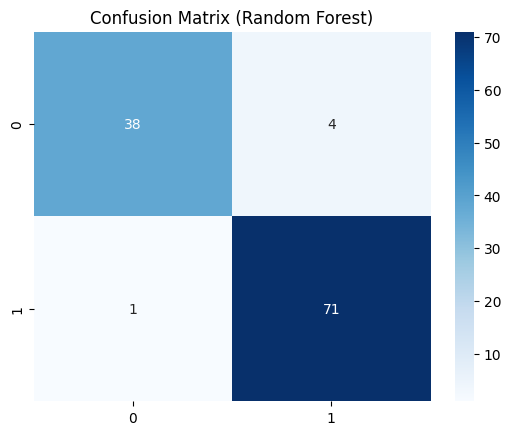

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



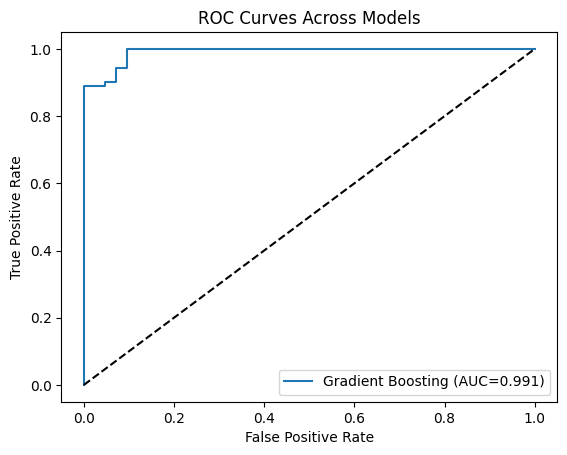

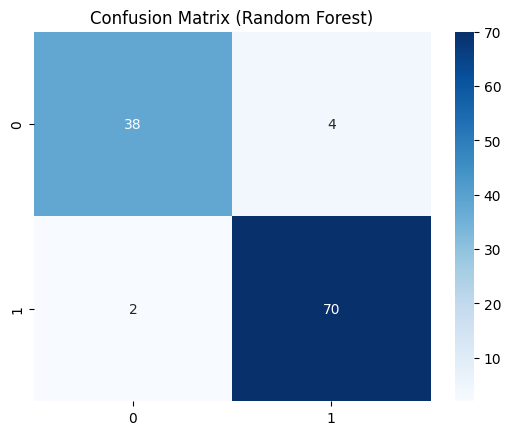

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



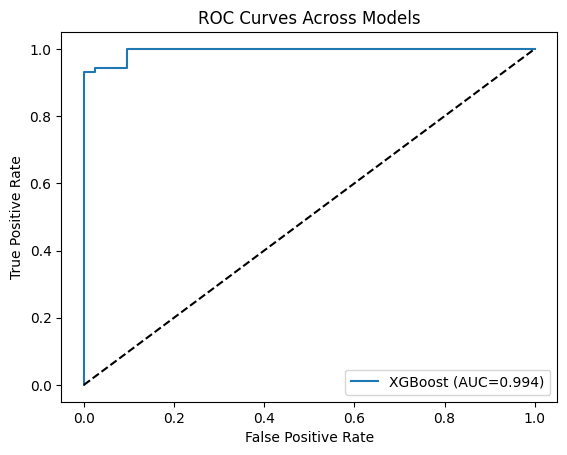

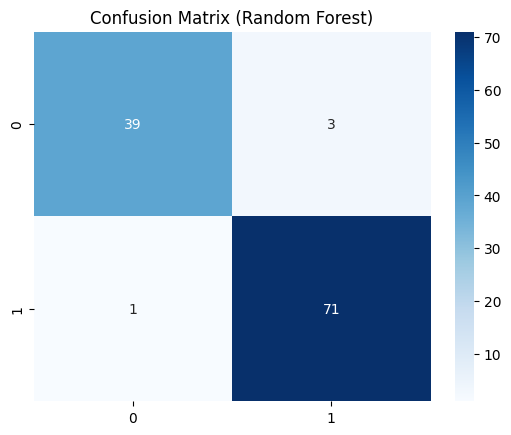

Classification Report (LightGBM):
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



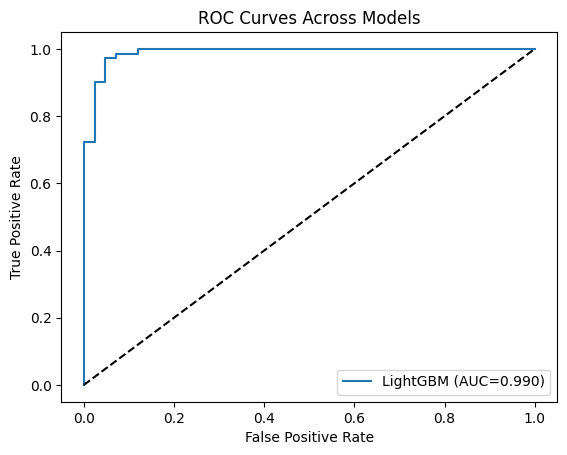

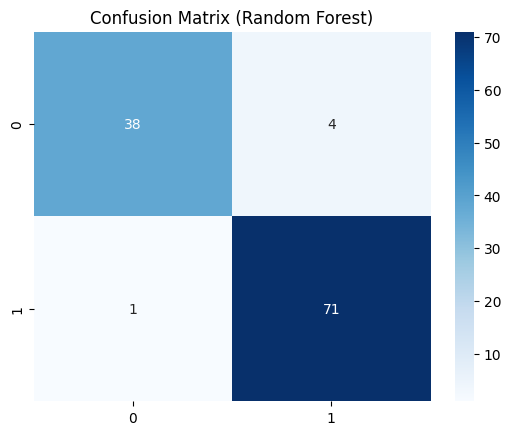

Classification Report (CatBoost):
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



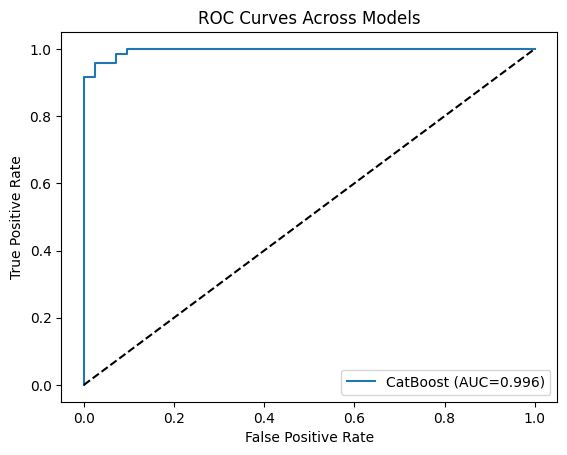

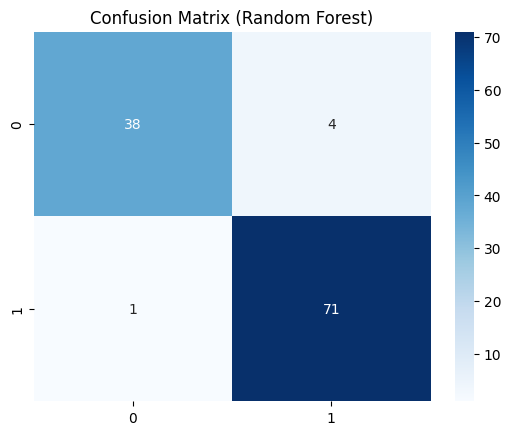

Classification Report (Stacking):
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



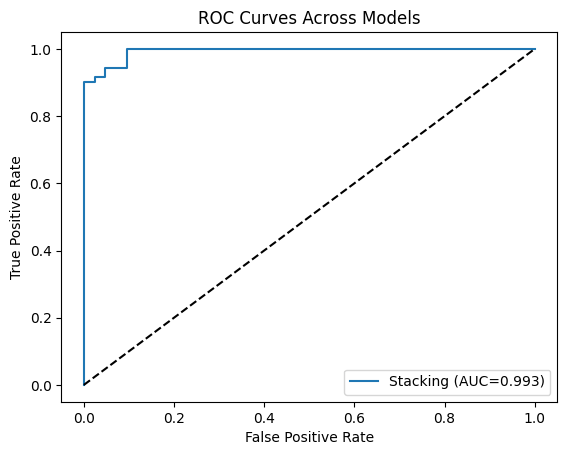

In [32]:
# Model Evaluation (Confusion Matrix, Report, ROC for all models)
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:,1]
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix (Random Forest)")
    plt.show()
    print(f"Classification Report ({name}):\n", classification_report(y_test, y_pred))
    
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
    # Plot ROC for all models
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves Across Models")
    plt.legend()
    plt.show()

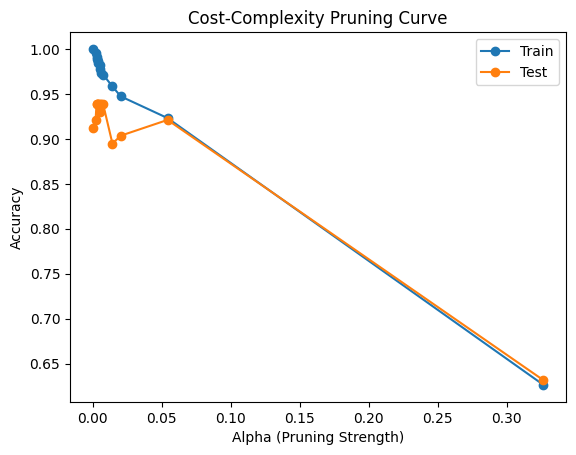

In [34]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

train_scores, test_scores = [], []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(ccp_alphas, train_scores, marker='o', label="Train")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test")
plt.xlabel("Alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.title("Cost-Complexity Pruning Curve")
plt.legend()
plt.show()

Random Forest Test Accuracy: 0.956140350877193


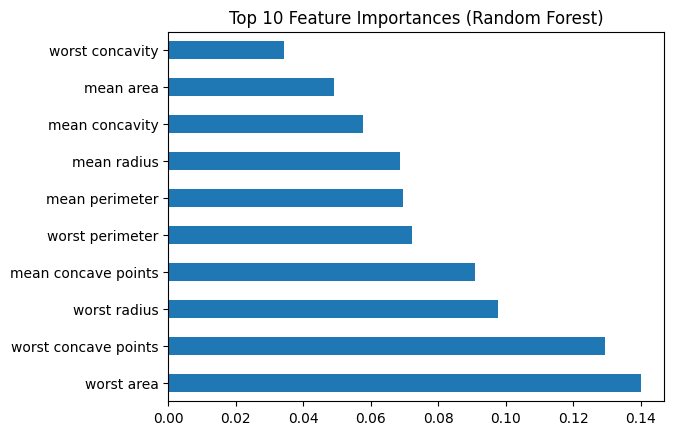

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Test Accuracy:", rf.score(X_test, y_test))

# Feature importance
feat_importance = pd.Series(rf.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind="barh")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

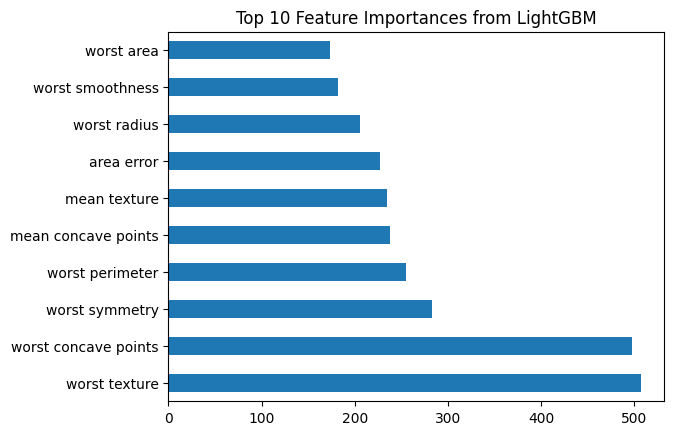

In [36]:
importances = pd.Series(models["LightGBM"].feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Top 10 Feature Importances from LightGBM")
plt.show()

## 12. Learning Curve: Bias-Variance Exploration (for Decision Tree example)

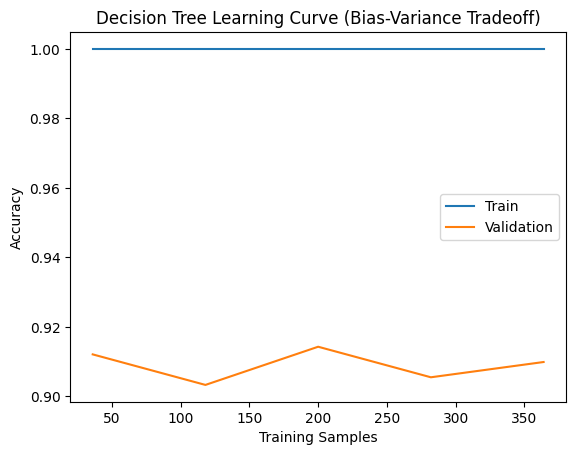

In [37]:
from sklearn.model_selection import learning_curve
sizes, train_scores, val_scores = learning_curve(
    dt, X_train, y_train, cv=5, scoring='accuracy'
)
plt.plot(sizes, np.mean(train_scores, axis=1), label="Train")
plt.plot(sizes, np.mean(val_scores, axis=1), label="Validation")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Decision Tree Learning Curve (Bias-Variance Tradeoff)")
plt.legend()
plt.show()

## 10. Save Model

The best metric to use when saving a model depends on the task, dataset, and what aspect of performance you prioritize:

For classification tasks like breast cancer detection, common metrics include:

    - Accuracy: Overall % of correctly classified samples. Easy but can be misleading if classes are imbalanced.
    - F1-score: Harmonic mean of precision and recall, balances false positives and false negatives. Often preferred for medical diagnosis.
    - ROC-AUC: Measures model’s ability to distinguish classes across all thresholds, robust for imbalanced data.
    - Precision or Recall: If false positives or false negatives have different costs, pick precision or recall accordingly.

For regression tasks, metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or Mean Absolute Error (MAE) focus on prediction error magnitude.

In [38]:
best_model = max(models.values(), key=lambda m: m.score(X_test, y_test))
best_model

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,200
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [39]:
import joblib
joblib.dump(models["LightGBM"], "lightgbm_model.pkl")
print("LightGBM model saved!")

LightGBM model saved!


1. Decision Tree
    - A simple, interpretable tree that splits data based on feature values to classify or predict.
    - Grows by choosing best splits to maximize purity reduction (Gini or entropy).
    - Prone to overfitting if too deep, as it fits training data precisely.
    - Easy to visualize and understand.

2. Random Forest
    - Ensemble of many decision trees grown on bootstrap samples (bagging).
    - Each tree trained on random subsets of features – reduces correlation among trees.
    - Aggregates multiple trees’ predictions for more robust, less noisy results.
    - Reduces overfitting and improves stability over single trees.

3. Extra Trees (Extremely Randomized Trees)
    - Similar to Random Forest but splits nodes randomly rather than searching for best splits.
    - Adds more randomness to reduce variance but may increase bias slightly.
    - Can be faster to train.

4. AdaBoost (Adaptive Boosting)
    - Sequentially trains weak trees, each focusing more on samples misclassified by previous trees.
    - Weights misclassified samples higher to boost learning where it’s hardest.
    - Combines many weak learners into a strong classifier.
    - Sensitive to noisy data and outliers.

5. Gradient Boosting
    - Builds trees sequentially to correct errors of previous trees, minimizing a loss function like log loss.
    - More flexible and powerful than AdaBoost, supports custom loss functions.
    - Can overfit if not tuned properly (requires careful setting of learning rate, depth).

6. XGBoost (Extreme Gradient Boosting)
    - Optimized and scalable implementation of gradient boosting.
    - Uses system optimizations (parallelization, tree pruning, regularization) for faster, better models.
    - Great for structured/tabular data with excellent performance in competitions.

7. LightGBM
    - Advanced gradient boosting library using leaf-wise tree growth instead of level-wise like XGBoost.
    - Faster training with lower memory usage.
    - Can overfit on small datasets but performs excellently on large, complex data.
    - Includes novel techniques like Gradient-based One-Side Sampling (GOSS) and Exclusive Feature Bundling (EFB).

8. CatBoost
    - Gradient boosting designed to handle categorical features natively without extensive preprocessing.
    - Uses ordered boosting to reduce overfitting.
    - User-friendly and robust for mixed numeric and categorical data.

9. Stacking
    - Ensemble of ensembles: combines predictions from different models (e.g., Random Forest + XGBoost) using a meta-model (e.g., Logistic Regression).
    - Leverages the strengths of multiple diverse models for improved final performance.